<a href="https://colab.research.google.com/github/lekshmilekshmi/ICT_DSA_ACTIVITIES/blob/main/lekshmi_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Introduction
# =========================
# - Brief description of the problem: Predict which customers are likely to churn.
# - Dataset overview: number of rows, columns, target variable.
# - Objective: Build and evaluate ML models to predict churn.
#2. Exploratory Data Analysis (EDA)
# =========================
# - Load train and test datasets using pd.read_csv().
# - Use df.info() and df.describe() to understand data types and distributions.
# - Visualize missing values (sns.heatmap or df.isnull().sum()).
# - Plot churn distribution (sns.countplot).
# - Explore numeric features using histograms or boxplots (sns.histplot, sns.boxplot).
# - Explore categorical features using countplots (sns.countplot).
# - Correlation analysis for numeric features (sns.heatmap with df.corr()).
# - Identify outliers and anomalies.
import pandas as pd
train = pd.read_csv("/content/Testing_data.csv")
test = pd.read_csv("/content/Training_data.csv")

In [ ]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1409, 21)
Test shape: (5634, 21)


In [ ]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [ ]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [ ]:
test.isnull().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [ ]:
train.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


/tmp/ipython-input-2599116481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x="Churn", palette="Set2")


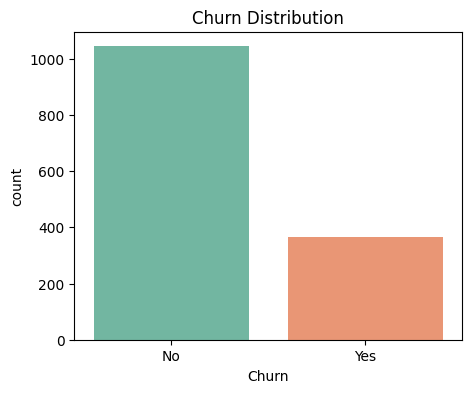

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.countplot(data=train, x="Churn", palette="Set2")
plt.title("Churn Distribution")
plt.show()

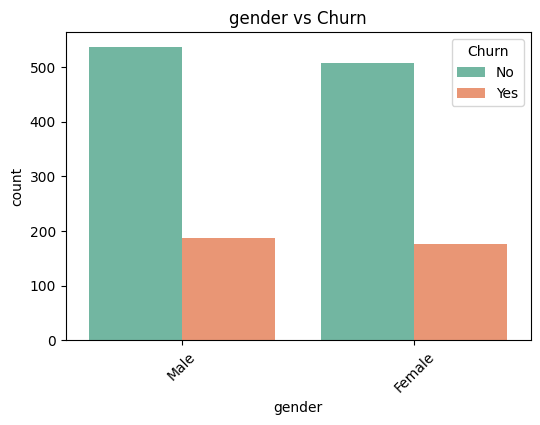

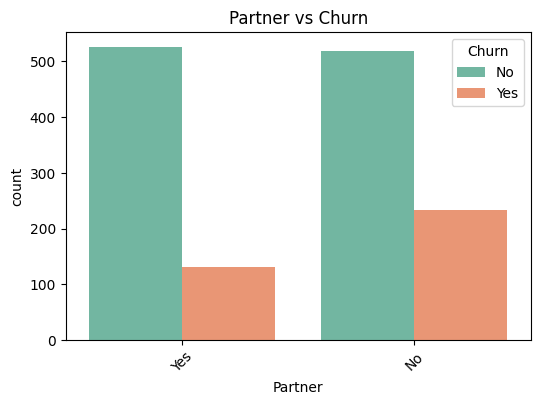

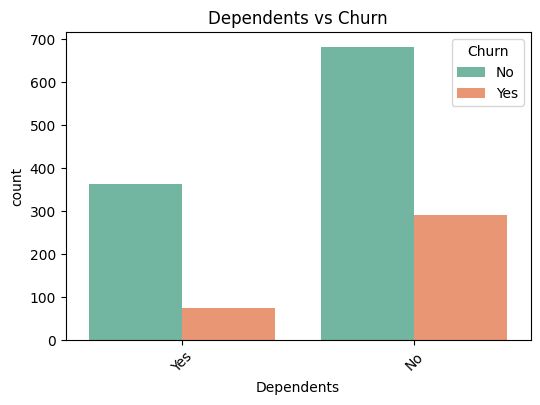

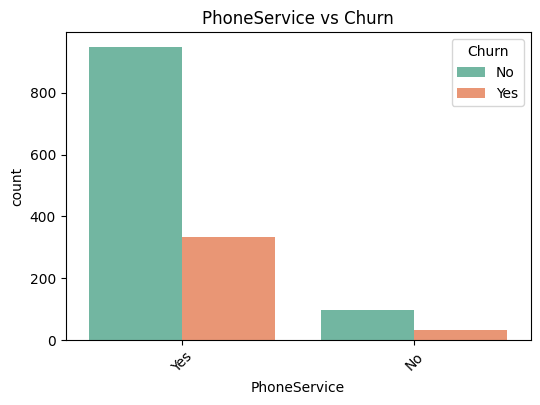

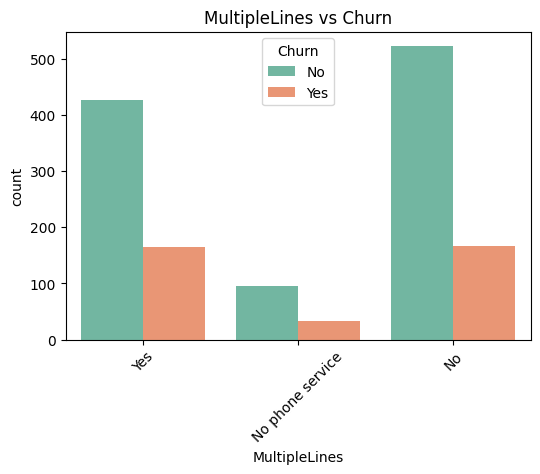

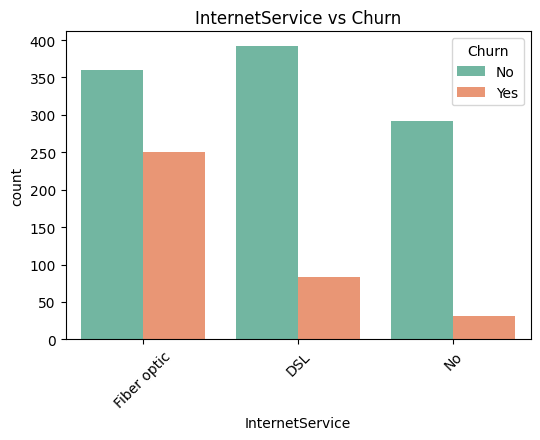

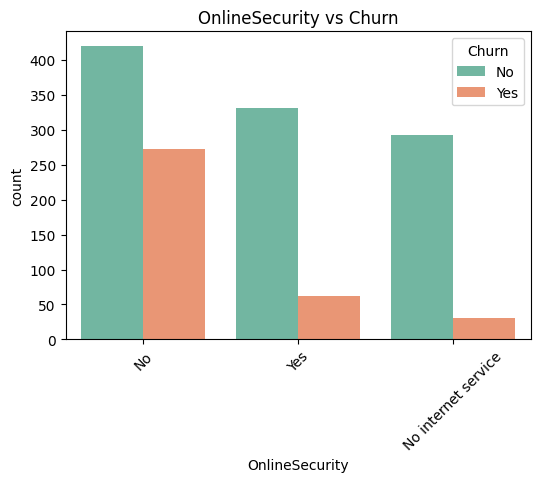

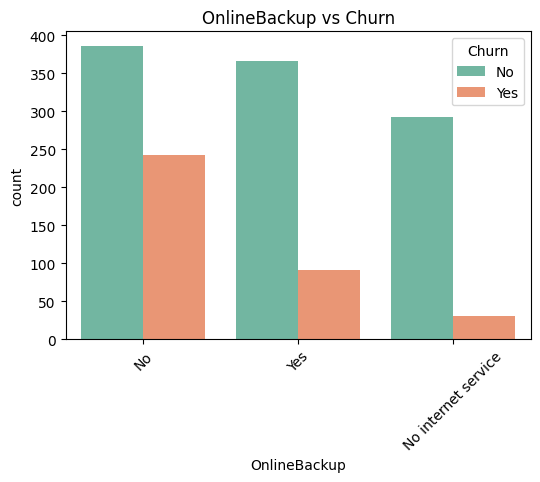

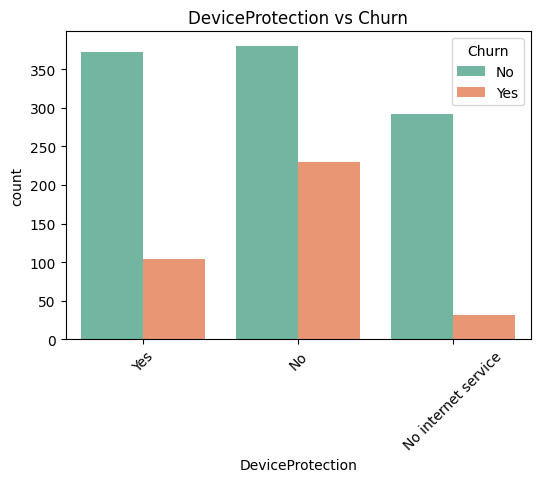

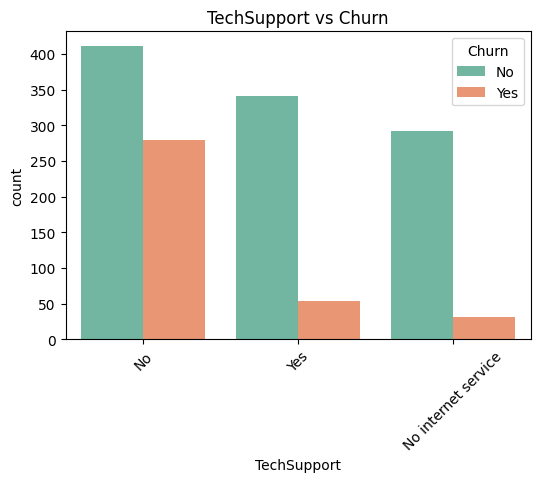

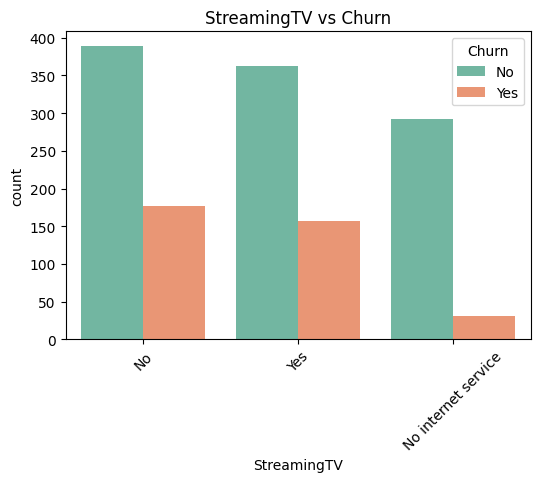

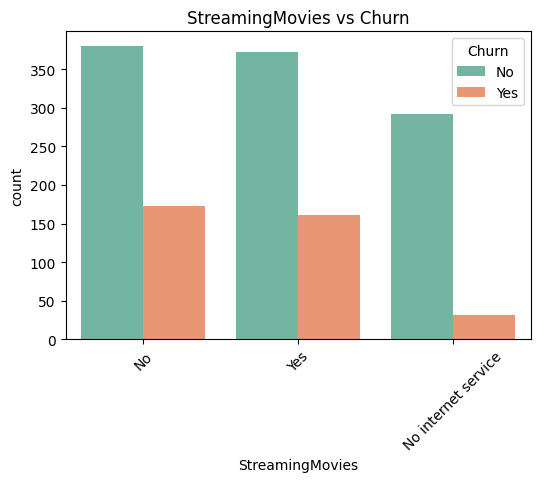

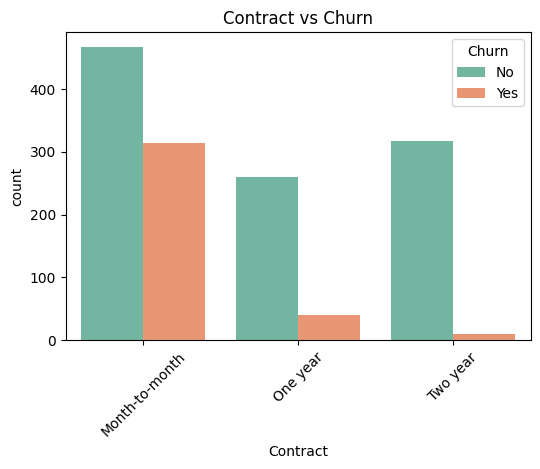

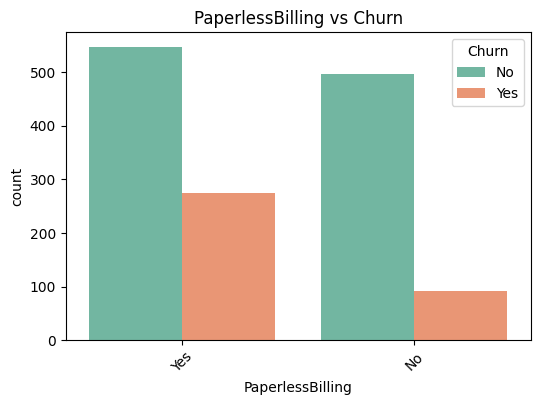

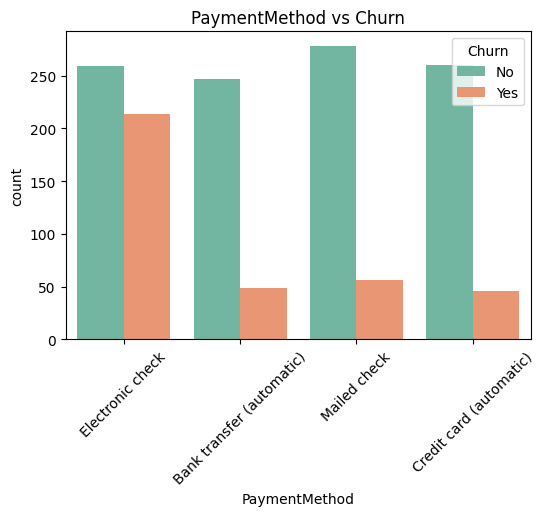

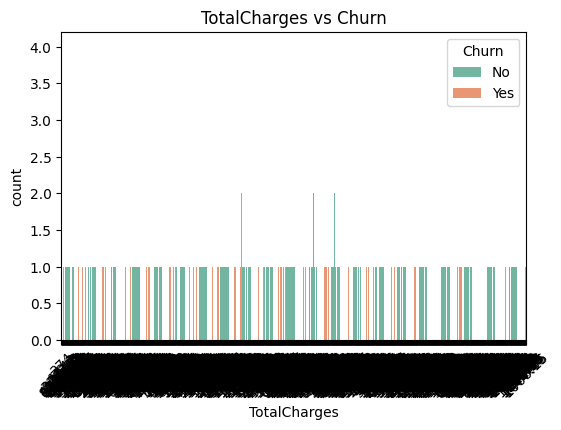

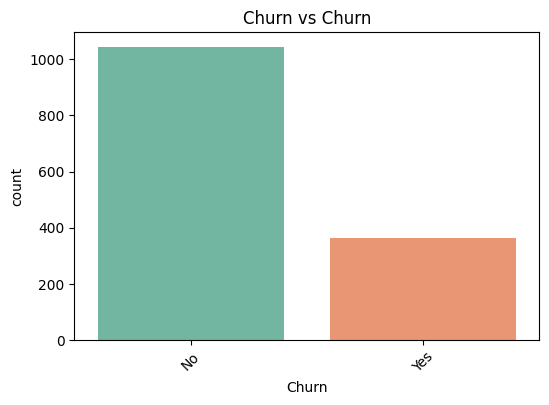

In [ ]:
categorical_cols = train.select_dtypes(include=["object"]).columns.drop(["customerID"])

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=train, x=col, hue="Churn", palette="Set2")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

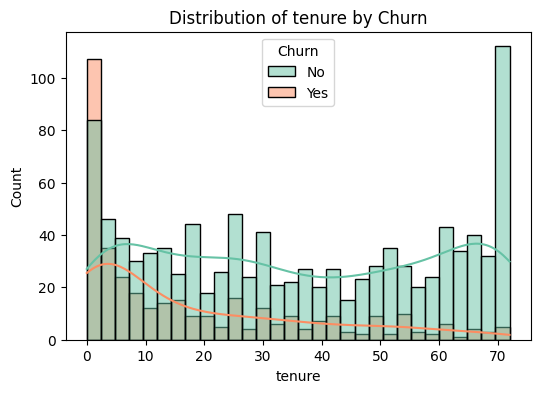

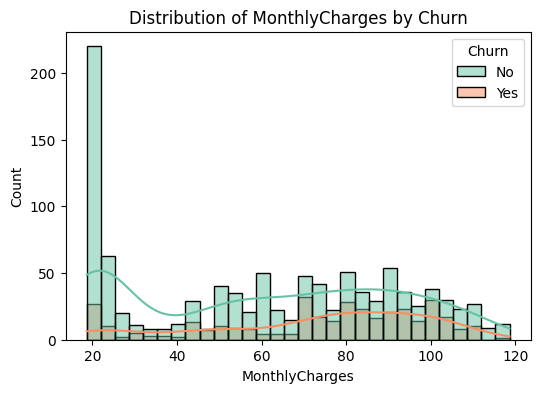

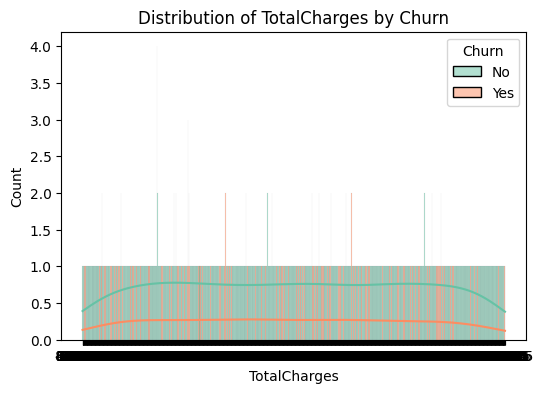

In [ ]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=train, x=col, hue="Churn", bins=30, kde=True, palette="Set2")
    plt.title(f"Distribution of {col} by Churn")
    plt.show()

/tmp/ipython-input-4257346389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x="Churn", y=col, palette="Set2")


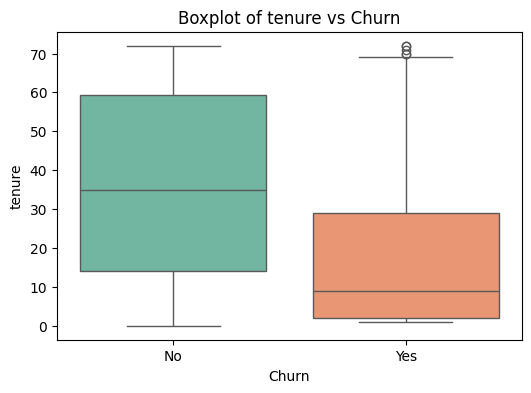

/tmp/ipython-input-4257346389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x="Churn", y=col, palette="Set2")


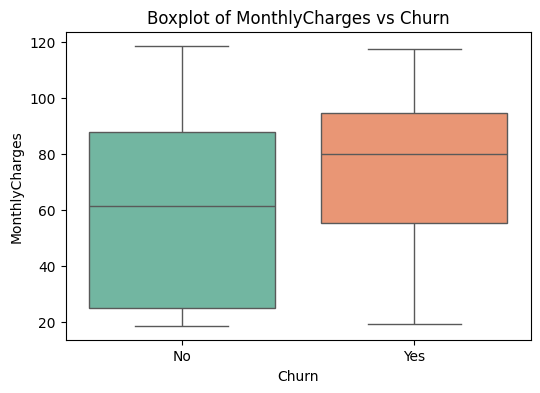

/tmp/ipython-input-4257346389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x="Churn", y=col, palette="Set2")


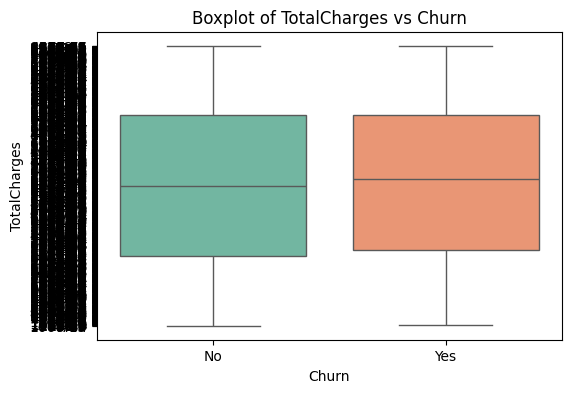

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=train, x="Churn", y=col, palette="Set2")
    plt.title(f"Boxplot of {col} vs Churn")
    plt.show()

In [ ]:
train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# 3. Data Preprocessing
# =========================
# - Handle missing values:
#     - Fill categorical columns with mode or 'Unknown'.
#     - Fill numerical columns with median or calculated values.
# - Encode categorical variables:
#     - Binary variables using LabelEncoder.
#     - Multi-class variables using OneHotEncoder or pd.get_dummies().
# - Scale/normalize numerical features using StandardScaler or MinMaxScaler.
# - Handle outliers if necessary (e.g., winsorization, clipping).

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Remove spaces from column names
train.columns = train.columns.str.strip()

# Fill missing categorical values
train["gender"] = train["gender"].fillna("Unknown")
train["OnlineSecurity"] = train["OnlineSecurity"].fillna("No")  # or "Unknown"

# Fill missing numeric values
train["MonthlyCharges"] = train["MonthlyCharges"].fillna(train["MonthlyCharges"].median())
train["TotalCharges"] = pd.to_numeric(train["TotalCharges"], errors="coerce")
train["TotalCharges"] = train["TotalCharges"].fillna(train["tenure"] * train["MonthlyCharges"])


In [ ]:
binary_cols = ["gender", "Partner", "Dependents", "PhoneService",
               "MultipleLines", "OnlineSecurity", "OnlineBackup",
               "DeviceProtection", "TechSupport", "StreamingTV",
               "StreamingMovies", "PaperlessBilling", "Churn"]

le = LabelEncoder()
for col in binary_cols:
    train[col] = le.fit_transform(train[col].astype(str))


In [ ]:
train = pd.get_dummies(train, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True)


In [ ]:
scaler = StandardScaler()
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
train[num_cols] = scaler.fit_transform(train[num_cols])


In [ ]:
import numpy as np
for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train[col] = np.where(train[col] < lower_bound, lower_bound, train[col])
    train[col] = np.where(train[col] > upper_bound, upper_bound, train[col])

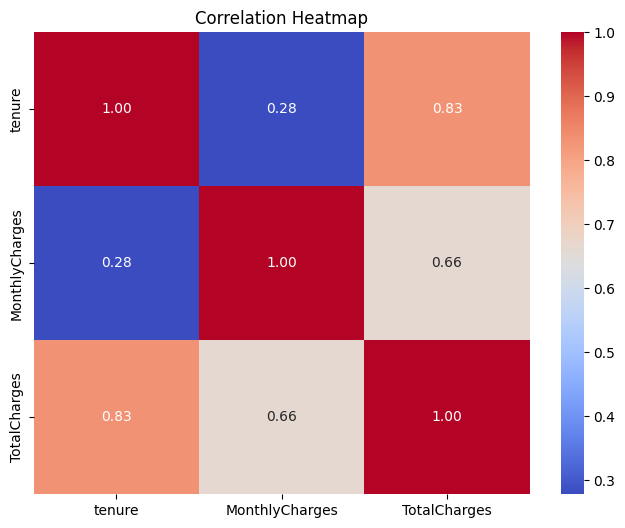

In [ ]:
plt.figure(figsize=(8,6))
corr = train[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 4. Feature Engineering
# =========================
# - Create interaction features (e.g., Tenure * Contract type).
# - Calculate customer lifetime value: Tenure * MonthlyCharges.
# - Perform feature selection:
#     - Use Random Forest feature importance or other selection methods.
# - Drop unnecessary columns (e.g., customerID).
# Interaction: Tenure × Contract type
train["Tenure_Contract_OneYear"] = train["tenure"] * train.get("Contract_One year", 0)
train["Tenure_Contract_TwoYear"] = train["tenure"] * train.get("Contract_Two year", 0)


In [ ]:
train["Tenure_Payment_ElecCheck"] = train["tenure"] * train.get("PaymentMethod_Electronic check", 0)
train["Tenure_Payment_MailedCheck"] = train["tenure"] * train.get("PaymentMethod_Mailed check", 0)
train["Tenure_Payment_CreditCard"] = train["tenure"] * train.get("PaymentMethod_Credit card (automatic)", 0)


In [ ]:
# CLV = tenure * MonthlyCharges
train["Customer_Lifetime_Value"] = train["tenure"] * train["MonthlyCharges"]


In [ ]:
service_cols = ["PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup",
                "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

train["Total_Services"] = train[service_cols].sum(axis=1)


In [ ]:
train["High_MonthlyCharges"] = (train["MonthlyCharges"] > train["MonthlyCharges"].median()).astype(int)


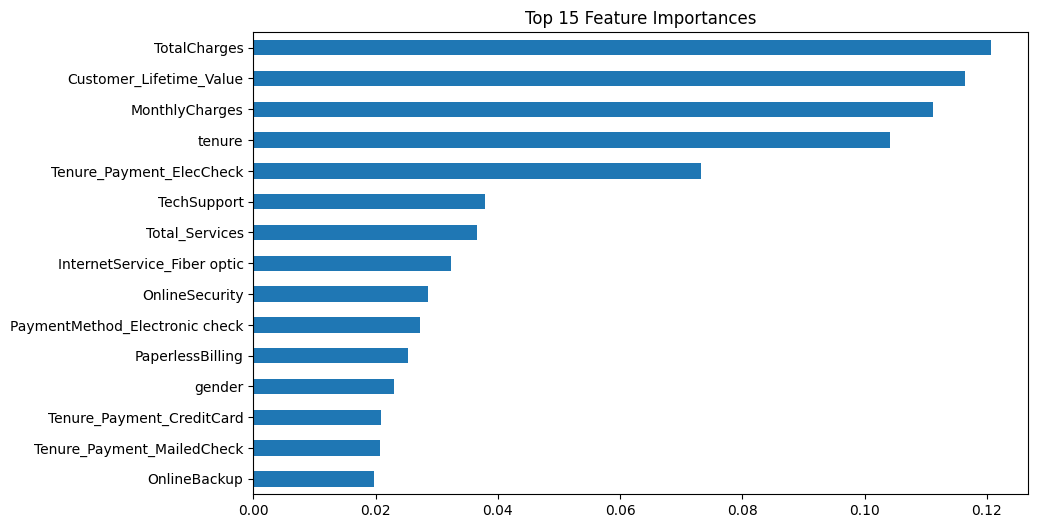

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Separate features and target
X = train.drop(columns=["Churn", "customerID"])  # remove target and ID
y = train["Churn"]

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
importances[:15].plot(kind="barh")
plt.title("Top 15 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


--- KNN ---
Accuracy: 0.7553
Precision: 0.5312
Recall: 0.4658


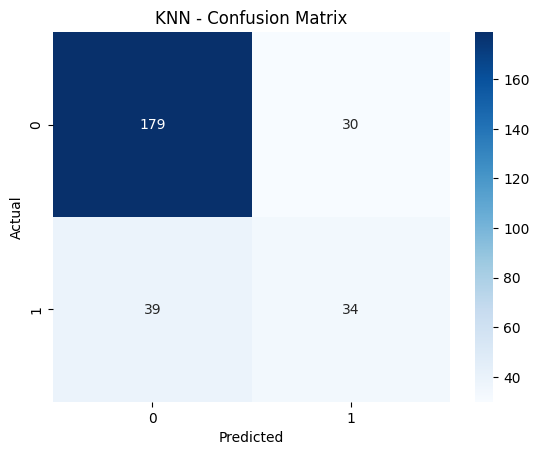

In [ ]:
5. Model Building
# =========================
# - Split dataset into train/validation sets using train_test_split().
# - Train models:
#     1. Random Forest
#     2. Decision Tree
#     3. SVM
#     4. KNN
#     5. Logistic Regression
#     6. Naive Bayes (optional)
# - Fit models on training data.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_val)
y_proba = knn.predict_proba(X_val)[:, 1]

#6. Model Evaluation
# =========================
# - Predict on validation set.
# - Evaluate metrics:
#     - Accuracy
#     - ROC-AUC
#     - F1 Score
#     - Precision
#     - Recall
# Metrics
print("--- KNN ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")



# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- Logistic Regression ---
Accuracy: 0.8050
Precision: 0.6667
Recall: 0.4932
F1-Score: 0.5669
ROC-AUC: 0.8213


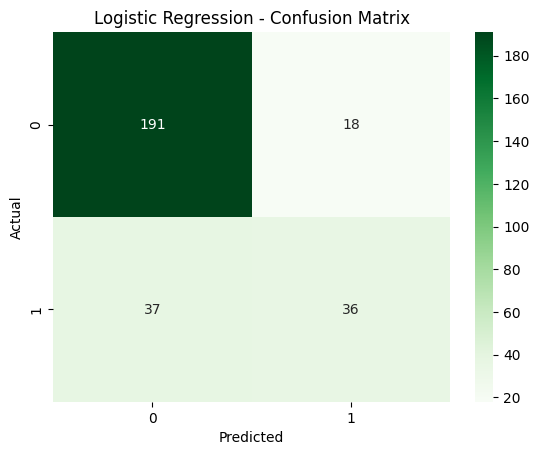

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_val)
y_proba = lr.predict_proba(X_val)[:, 1]

# Metrics
print("--- Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- Naive Bayes ---
Accuracy: 0.7305
Precision: 0.4874
Recall: 0.7945
F1-Score: 0.6042
ROC-AUC: 0.8179


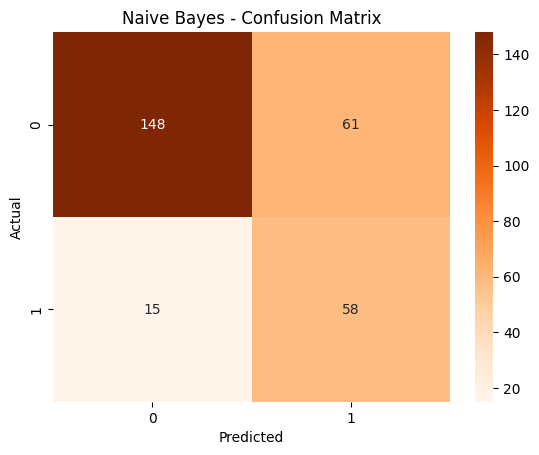

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_val)
y_proba = nb.predict_proba(X_val)[:, 1]

# Metrics
print("--- Naive Bayes ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- Decision Tree ---
Accuracy: 0.7163
Precision: 0.4545
Recall: 0.4795
F1-Score: 0.4667
ROC-AUC: 0.6392


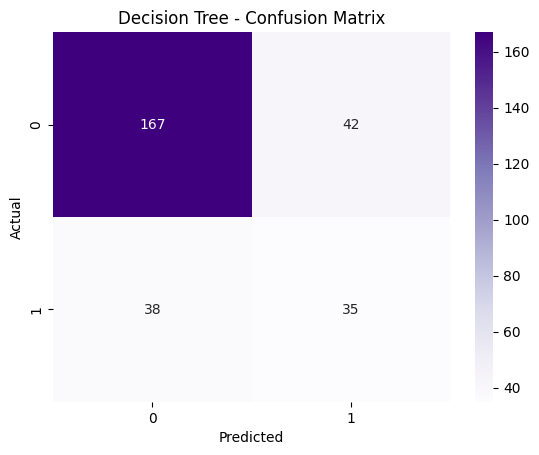

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_val)
y_proba = dt.predict_proba(X_val)[:, 1]

# Metrics
print("--- Decision Tree ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- Random Forest ---
Accuracy: 0.7979
Precision: 0.7000
Recall: 0.3836
F1-Score: 0.4956
ROC-AUC: 0.8018


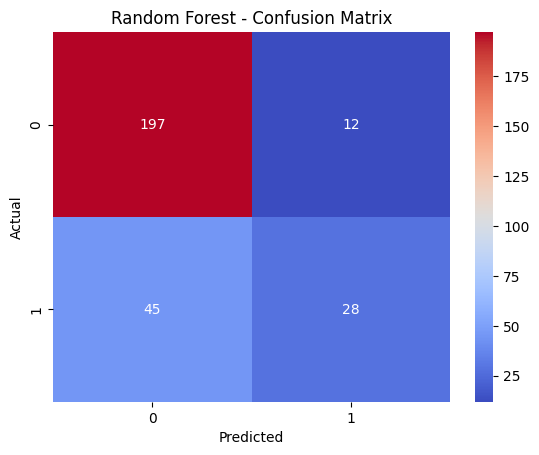

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_val)
y_proba = rf.predict_proba(X_val)[:, 1]

# Metrics
print("--- Random Forest ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- SVM ---
Accuracy: 0.7979
Precision: 0.6667
Recall: 0.4384
F1-Score: 0.5289
ROC-AUC: 0.7843


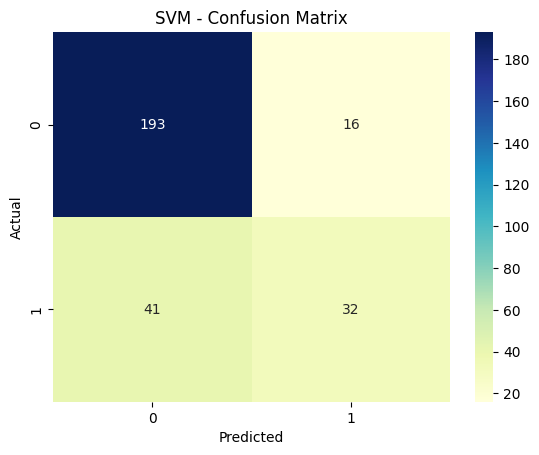

In [ ]:
from sklearn.svm import SVC

# Initialize and train SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_val)
y_proba = svm_model.predict_proba(X_val)[:, 1]

# Metrics
print("--- SVM ---")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# 7. Hyperparameter Tuning
# =========================
# - Use RandomizedSearchCV or GridSearchCV for each model.
# - Define hyperparameter grids:
#     - Random Forest: n_estimators, max_depth, min_samples_split, etc.
#     - Decision Tree: max_depth, min_samples_split, etc.
#     - SVM: C, gamma, kernel
#     - KNN: n_neighbors, weights, metric
#     - Logistic Regression: C, penalty, solver
# - Fit RandomizedSearchCV on training data.
# - Get best parameters and refit model.
# - Evaluate tuned model on validation set.
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}
rand_rf = RandomizedSearchCV(
    rf,
    rf_params,
    n_iter=20,          # only 20 random combinations
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)
rand_rf.fit(X_train, y_train)
# Best model
best_rf = rand_rf.best_estimator_
print("Best Random Forest params:", rand_rf.best_params_)

# Predict on validation set
y_proba_rf = best_rf.predict_proba(X_val)[:, 1]  # probabilities for ROC-AUC
y_pred_rf = best_rf.predict(X_val)               # class predictions

# Evaluate metrics
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

roc_auc = roc_auc_score(y_val, y_proba_rf)
f1 = f1_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf)
recall = recall_score(y_val, y_pred_rf)

print("ROC-AUC:", round(roc_auc, 4))
print("F1 Score:", round(f1, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Random Forest params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
ROC-AUC: 0.8085
F1 Score: 0.5378
Precision: 0.6957
Recall: 0.4384


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
dt_params = {
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}
rand_dt = RandomizedSearchCV(
    dt,
    dt_params,
    n_iter=10,          # 10 random combinations
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data
rand_dt.fit(X_train, y_train)

# Best model
best_dt = rand_dt.best_estimator_
print("Best Decision Tree params:", rand_dt.best_params_)

# Predictions
y_proba_dt = best_dt.predict_proba(X_val)[:, 1]  # probabilities
y_pred_dt = best_dt.predict(X_val)               # class predictions

# Evaluate metrics
roc_auc = roc_auc_score(y_val, y_proba_dt)
f1 = f1_score(y_val, y_pred_dt)
precision = precision_score(y_val, y_pred_dt)
recall = recall_score(y_val, y_pred_dt)

print("Decision Tree ROC-AUC:", round(roc_auc, 4))
print("F1 Score:", round(f1, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Decision Tree params: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20}
Decision Tree ROC-AUC: 0.767
F1 Score: 0.5077
Precision: 0.5789
Recall: 0.4521


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
svm_params = {
    "C": [0.1, 1, 10],
    "gamma": ['scale', 0.01, 0.001],
    "kernel": ['rbf', 'linear']
}
rand_svm = RandomizedSearchCV(
    svm_model,
    svm_params,
    n_iter=10,      # 10 random combinations
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data
rand_svm.fit(X_train, y_train)

# Best model
best_svm = rand_svm.best_estimator_
print("Best SVM params:", rand_svm.best_params_)

# Predict using decision function
y_score_svm = best_svm.decision_function(X_val)  # continuous scores
y_pred_svm = best_svm.predict(X_val)             # class predictions

# Evaluate metrics
roc_auc = roc_auc_score(y_val, y_score_svm)
f1 = f1_score(y_val, y_pred_svm)
precision = precision_score(y_val, y_pred_svm)
recall = recall_score(y_val, y_pred_svm)

print("SVM ROC-AUC:", round(roc_auc, 4))
print("F1 Score:", round(f1, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best SVM params: {'kernel': 'linear', 'gamma': 'scale', 'C': 10}
SVM ROC-AUC: 0.7942
F1 Score: 0.5512
Precision: 0.6481
Recall: 0.4795


In [ ]:
knn_params = {
    "n_neighbors": [3, 5, 7],
    "weights": ['uniform', 'distance'],
    "metric": ['euclidean', 'manhattan']
}

# RandomizedSearchCV
rand_knn = RandomizedSearchCV(
    knn,
    knn_params,
    n_iter=10,     # 10 random combinations
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data
rand_knn.fit(X_train, y_train)

# Best model
best_knn = rand_knn.best_estimator_
print("Best KNN params:", rand_knn.best_params_)

# Predict
y_proba_knn = best_knn.predict_proba(X_val)[:, 1]  # probabilities
y_pred_knn = best_knn.predict(X_val)              # class predictions

# Evaluate metrics
roc_auc = roc_auc_score(y_val, y_proba_knn)
f1 = f1_score(y_val, y_pred_knn)
precision = precision_score(y_val, y_pred_knn)
recall = recall_score(y_val, y_pred_knn)

print("KNN ROC-AUC:", round(roc_auc, 4))
print("F1 Score:", round(f1, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best KNN params: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan'}
KNN ROC-AUC: 0.7698
F1 Score: 0.5248
Precision: 0.5441
Recall: 0.5068


In [ ]:
lr_params = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ['l2'],           # keep simple for speed
    "solver": ['liblinear', 'saga']
}


# RandomizedSearchCV
rand_lr = RandomizedSearchCV(
    lr,
    lr_params,
    n_iter=8,          # 8 random combinations
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data
rand_lr.fit(X_train, y_train)

# Best model
best_lr = rand_lr.best_estimator_
print("Best Logistic Regression params:", rand_lr.best_params_)

# Predict probabilities
y_proba_lr = best_lr.predict_proba(X_val)[:, 1]  # probabilities
y_pred_lr = best_lr.predict(X_val)               # class predictions

# Evaluate metrics
roc_auc = roc_auc_score(y_val, y_proba_lr)
f1 = f1_score(y_val, y_pred_lr)
precision = precision_score(y_val, y_pred_lr)
recall = recall_score(y_val, y_pred_lr)

print("Logistic Regression ROC-AUC:", round(roc_auc, 4))
print("F1 Score:", round(f1, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Logistic Regression params: {'solver': 'saga', 'penalty': 'l2', 'C': 0.1}
Logistic Regression ROC-AUC: 0.8209
F1 Score: 0.5538
Precision: 0.6316
Recall: 0.4932


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd

# Create a list of models and their best estimators
models = {
    "Random Forest": best_rf,
    "Decision Tree": best_dt,
    "SVM": best_svm,
    "KNN": best_knn,
    "Logistic Regression": best_lr
}

# Store results
results = []

for name, model in models.items():
    # For SVM, use decision_function for ROC-AUC
    if name == "SVM":
        roc_auc = roc_auc_score(y_val, model.decision_function(X_val))
    else:
        roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

    y_pred = model.predict(X_val)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_val, y_pred), 4),
        "ROC-AUC": round(roc_auc, 4),
        "F1": round(f1_score(y_val, y_pred), 4),
        "Precision": round(precision_score(y_val, y_pred), 4),
        "Recall": round(recall_score(y_val, y_pred), 4)
    })

# Convert to DataFrame
summary_df = pd.DataFrame(results)

# Display the summary table
print(summary_df)


                 Model  Accuracy  ROC-AUC      F1  Precision  Recall
0        Random Forest    0.8050   0.8085  0.5378     0.6957  0.4384
1        Decision Tree    0.7730   0.7670  0.5077     0.5789  0.4521
2                  SVM    0.7979   0.7942  0.5512     0.6481  0.4795
3                  KNN    0.7624   0.7698  0.5248     0.5441  0.5068
4  Logistic Regression    0.7943   0.8209  0.5538     0.6316  0.4932
